In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#dataset containing faces
from sklearn.datasets import fetch_lfw_people

#dataset images étiquetées
people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

# largeur et longueur des images
n_samples, h, w = people.images.shape
#données, (chaque image est dans un tableau ou vecteur 1 dimension) 
X = people.data
#étiquettes de chaque image ex f(X[0]) = Y[0] = 5 => names[5] = "G. bush"
Y = people.target
names = people.target_names
# Divisons nos données en données d'entrainement et en données qui nous seviront pour tester si notre fonction marche bien

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size = 0.25, random_state = 42)
#Le but de l'exercice est donc de créer cette fonction f(x) qui quand on lui fournit une image, nous donne le nom de la personne 
X = X_train

![](EquationsImages/meanImages.png)


Text(0.5, 1.0, 'Visage moyen creepy shit')

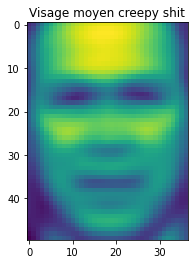

In [2]:
#Calculons la moyenne des visages :o
visageMoyen = np.zeros(h*w) #Initialisser un tableau numpy vide 1 dimension
#Ajouter toutes les images
for image in X:
    visageMoyen = np.add(image,visageMoyen)
#Diviser par le nombre d'images
visageMoyen = np.divide(visageMoyen,len(X))
plt.imshow(visageMoyen.reshape((h,w)))
plt.title("Visage moyen creepy shit")


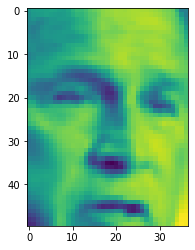

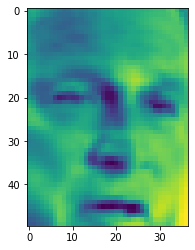

In [3]:
# On soustrait à chaque image la moyenne, afin d'avoir uniquement les informations qui caractérisent chaque image
plt.figure()
plt.imshow(X[0].reshape((h,w)))
for i in range(len(X)):
    X[i]-=visageMoyen
plt.figure()
plt.imshow(X[0].reshape((h,w)))

In [4]:
# Desormais on calcule la matrice de covariance A dont les colonnes sont les images, et les lignes sont les coordonnées
# On possède une dataSet de 966 images
# décrivants l'image ex image1=(1,0,255,23,...) dim(image1) = h*w = 1850
# A est donc une matrice de 966 colonnes par 1850 lignes

# la matrice de covariance K(x) est définie comme suit
![](EquationsImages/covarianceMat.png)
# Notre matrice A est définie comme suit
![](EquationsImages/matrixA.png)

# Ayant deja éffectuer la moyenne, et en l'ayant soustrait, la formule des covariance qui constituent notre matrice de covariance se définient comme suit:
![](EquationsImages/lagrida_latex_editor.png)
# On a donc plus généralement : 
![](EquationsImages/covarianceMatrix.png)
# Néanmoins cette relation va nous donner une matrice de covariance de 966 colonnes par 1850 lignes, et on aura donc à calculer 1850 vecteur propres <img src="EquationsImages/ui.png" alt="drawing" width="40"/>ce qui peut s'avérer couteux en calcul.

# On pose : 
![](EquationsImages/cov2.png)
# Cette matrice est de 1850 colonnes par 966 lignes, possède donc 966 vecteurs propres <img src="EquationsImages/vi.png" alt="drawing" width="40"/> tels que:
![](EquationsImages/equ1.png)
# En multipliant par "A" des deux cotés :
![](EquationsImages/equ2.png)
# Sachant : <img src="EquationsImages/eq3.png" alt="drawing" width="200"/>
# Il vient : ![](EquationsImages/equ42.png)
# On a donc juste à calculer les 966 vecteurs propres de la matrice C, et avoir ceux de notre matrice de covariance K à l'aide de la formule 
<img src="EquationsImages/equ5.png" alt="drawing" width="100"/>

In [5]:
# Il se trouve que notre matrice A est justement la matrice X
A = np.copy(np.transpose(X))


<AxesSubplot:>

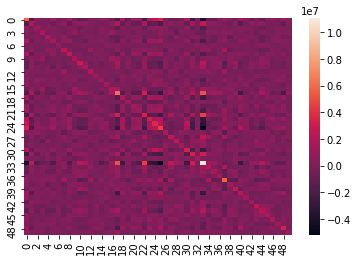

In [6]:
# On construit la matrice de correlaction C = At * A
C = np.dot(np.transpose(A),A)
sns.heatmap(C[0:50,0:50])

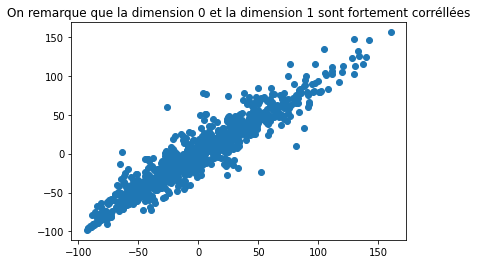

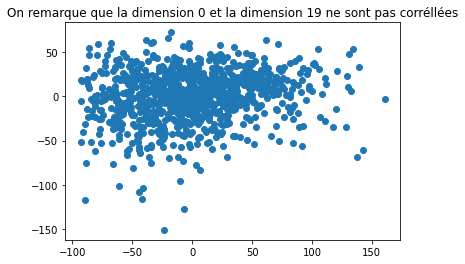

In [7]:
def showEllipsoid(dim1, dim2):
    plt.scatter(A[dim1,0:966],A[dim2,0:966])
plt.figure()
plt.title("On remarque que la dimension 0 et la dimension 1 sont fortement corréllées")
showEllipsoid(0,1)
plt.figure()
plt.title("On remarque que la dimension 0 et la dimension 19 ne sont pas corréllées")
showEllipsoid(0,19)



In [8]:
# Calculons les vecteurs propres vi de la matrice C


In [11]:
#Change it later do it manually
K = np.matmul(A,np.transpose(A))
eigvalue, eigvector1 = np.linalg.eig(C)
#sort by eigenvalues
idx = eigvalue.argsort()[::-1]   
eigvalue = eigvalue[idx]
eigvector1 = eigvector1[:,idx]
eigvector1=np.transpose(eigvector1)
#u1 = np.dot(A,eigvector1[0])

966

In [27]:
numberOfEigs = 150
ui=[]
for i in range(numberOfEigs):
    ui.append(np.dot(A,eigvector1[i]))
ui = [ui[i]*(1/np.linalg.norm(ui[i])) for i in range(len(ui))]

# Le bloc suivant est à executer qu'une seule fois ! le commenter définitivement aprés!
# Il permet d'écrire les valeurs de 'Wi' de nos 1850 images sur un fichier pickle afin de ne pas avoir à recalculer les 'Wi'

In [28]:
#On aura plus besoin des images sur X, car désormais on posssède "numberOfEigs" valeurs qui caractèrisent de manière unique les photos 
# de notre base de données
# W=[]
# for i in range(len(X)):
#     weights = np.dot(ui,X[i])
#     W.append(weights)
import pickle 
# pickle.dump( W, open( "images weights.pkl", "wb" ) )
#tab = [[ui[i],eigvalue[i]] for i in range(len(ui))]
#pickle.dump(tab, open("eigvector-value.pkl","wb"))

In [29]:
W = [] #contient 1287 tableau de 10 valeurs (Wi) qui caractèrisennt une image de manière unique dans notre Base de donnees
with open('images weights.pkl', 'rb') as f:
    W = pickle.load(f)

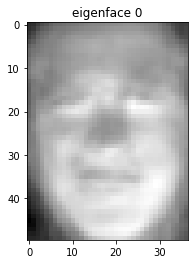

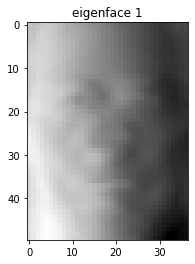

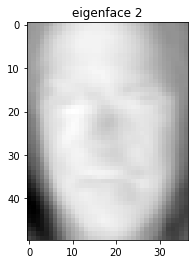

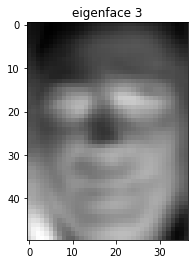

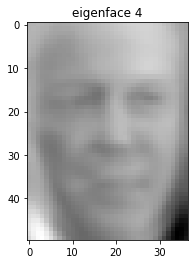

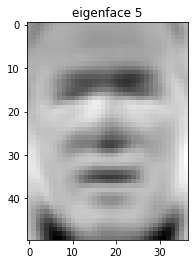

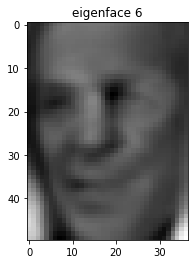

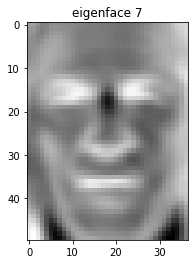

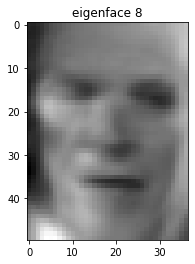

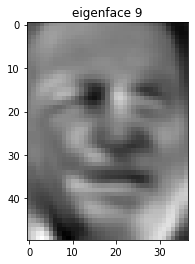

In [30]:
for i in range(10):
    plt.figure()
    plt.title("eigenface "+str(i))
    plt.imshow((ui[i]).reshape((h,w)), cmap = plt.cm.gray)

In [31]:
# Fin du PCA, on a réduit la dimensionnalité de nos images, passant de 1850 valeurs caractérisant une seule image à
# "nbOfEigs" valeurs Wi caractérisant une image.
#

In [32]:
# pour la classification on utilise méthode des K plus proches voisins

In [56]:
def KNN(imgIndex,K):
    tab=[]
    for i in range(len(W)):
        dist = ((W[imgIndex] -W[i])**2).mean(axis=None)
        tab.append({"dist":dist, "class":Y[i]})
    tab = sorted(tab,key=lambda x : x["dist"]) 
    compteurs=[0,0,0,0,0,0,0]
    for i in range(K):
        compteurs[tab[i]["class"]]+=1
    res=0
    biggest=-1111
    for i in range(len(compteurs)):
        if(compteurs[i]>biggest):
                biggest = compteurs[i]
                res=i
    print(compteurs)
    return res

In [57]:
tab=KNN(10,10)

[0, 1, 2, 5, 0, 1, 1]


In [55]:
tab

3

In [47]:
Y[10]

3

In [58]:
len(X)

966

In [59]:
len(X_test)

322

In [61]:
y_train[0]

3